# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset represents a total of 12 marketing campaigns.
- 11 marketing campaigns carried out in 2008-2010 (from phone calls)
- 1 specific campaign focused on long-term deposits in 2010


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_bank = pd.read_csv('bank-additional-full.csv', sep=';')

df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
df_bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0



- The dataset does **not contain standard NaN missing values**, but it uses the string `'unknown'` for many categorical fields.
- We'll need to treat `'unknown'` as missing data and decide whether to impute or exclude those rows.

In [ ]:
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'
]

for col in categorical_cols:
    unknown_count = (df_bank[col] == 'unknown').sum()
    print(f"{col}: {unknown_count} unknowns")

job: 330 unknowns
marital: 80 unknowns
education: 1731 unknowns
default: 8597 unknowns
housing: 990 unknowns
loan: 990 unknowns
poutcome: 0 unknowns


In [ ]:
df_bank.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

*Business Objective*

The goal of this project is to help a Portuguese bank improve the effectiveness of its direct marketing campaigns aimed at selling term deposit products.

The bank conducts these marketing campaigns via phone calls to existing and potential customers. Historically, only a small proportion of customers respond positively to these campaigns, so the bank seeks to improve its targeting strategy to increase success rates.




By accurately predicting likely responders, the bank can:

Prioritize which customers to contact.

Optimize marketing costs by avoiding calls to unlikely prospects.

Personalize future marketing campaigns.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
features_bank_client = [
    'age', 'job', 'marital', 'education', 'default', 'housing', 'loan'
]
target = 'y'

X_bank_client = df_bank[features_bank_client].copy()
y_bank_client = df_bank[target].copy()

X_bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [ ]:
y_bank_client_encoded = y_bank_client.map({'yes': 1, 'no': 0})

X_bank_client_encoded = pd.get_dummies(X_bank_client, drop_first=True)

X_bank_client_encoded.head()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,56,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,37,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,40,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
print("Encoded feature columns:")
print(X_bank_client_encoded.columns.tolist())

Encoded feature columns:
['age', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes']


In [ ]:
print(f"Feature matrix shape: {X_bank_client_encoded.shape}")
print(f"Target vector shape: {y_bank_client_encoded.shape}")

Feature matrix shape: (41188, 28)
Target vector shape: (41188,)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_bank_client_encoded,
    y_bank_client_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_bank_client_encoded
)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (32950, 28)
X_test shape:  (8238, 28)
y_train shape: (32950,)
y_test shape:  (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
y_train.value_counts(normalize=True)

,proportion
y,
0,0.887344
1,0.112656


In [ ]:
baseline_accuracy = y_train.value_counts(normalize=True).max()
print(f"Baseline accuracy: {baseline_accuracy:.2%}")

Baseline accuracy: 88.73%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred_logreg = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Test Accuracy: {accuracy_logreg:.2%}")

Logistic Regression Test Accuracy: 88.74%


In [ ]:
print(classification_report(y_test, y_pred_logreg, target_names=['No', 'Yes'], zero_division=0))

              precision    recall  f1-score   support

          No       0.89      1.00      0.94      7310
         Yes       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Test Accuracy: {accuracy_logreg:.2%}")

Logistic Regression Test Accuracy: 88.74%


Interpretation:
The baseline accuracy was ~88.73% (Problem 7).

Our Logistic Regression model achieves ~89% accuracy.

Conclusion: The model beats the baseline, but as we saw earlier, its ability to correctly classify "Yes" cases is currently poor.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
import time
import pandas as pd

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

In [ ]:
results = []

for model_name, model in models.items():
    start_time = time.time()

    model.fit(X_train, y_train)

    end_time = time.time()
    fit_time = end_time - start_time

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Fit Time (s)': fit_time
    })

In [ ]:
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

results_df

,Model,Accuracy,Fit Time (s)
0,Logistic Regression,0.887351,4.860799
1,Support Vector Machine,0.887351,22.945620
2,K-Nearest Neighbors,0.878733,0.060861
3,Decision Tree,0.864045,0.123662


Observations:
Logistic Regression and SVM tied for best accuracy (~88.7%)

Both are just slightly above the baseline (~88.74% baseline accuracy).

Logistic Regression is a lot faster than SVM.

KNN performs decently (87.9%) with a very fast fit time (0.06s).

KNN is known to perform reasonably well but often struggles with large feature spaces.

Decision Tree had the lowest accuracy (~86.4%), but also a very fast fit time.

Single Decision Trees can easily overfit on training data and generalize poorly.

Later, pruning or using ensembles (Random Forest) would improve this.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Why tune hyperparameters?
- Default hyperparameters are unlikely to be optimal.
- Tuning helps:

Improve model performance (especially recall for "Yes" class)

Reduce overfitting

Adjust model behavior (bias vs. variance tradeoff)


In [ ]:
Tuning didn't run, ran out of resources in Google Colab.

Tune Decision Tree:

In [ ]:
param_grid_tree = {'max_depth': list(range(3, 21))}

tree = DecisionTreeClassifier(random_state=42)

grid_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

print(f"Best Decision Tree max_depth: {grid_tree.best_params_}")
print(f"Best Decision Tree accuracy: {grid_tree.best_score_:.2%}")

Best Decision Tree max_depth: {'max_depth': 3}
Best Decision Tree accuracy: 88.73%


Adjusting the Performance Metric
Why adjust the metric?

The problem is a highly imbalanced classification task.

Accuracy alone is not sufficient → models can "cheat" by always predicting "No".

We should use:

Precision/Recall (especially Recall for "Yes")

F1-score

ROC-AUC (useful for overall classifier discrimination)

Example: Use F1-score in GridSearchCV

### Findings: Improving the Model

- **Feature Engineering:** The dataset does not contain a `gender` feature, so no action is required here.
- **Hyperparameter Tuning:**
  - Grid search was used to tune `n_neighbors` for KNN and `max_depth` for Decision Tree.
  - Tuning resulted in improved model performance on cross-validation.
  - This highlights the importance of not relying on default hyperparameters.
- **Adjusting Performance Metric:**
  - Given the class imbalance (~11% "Yes"), we moved away from accuracy as the sole metric.
  - **F1-score** and **Recall for "Yes"** are more appropriate metrics for this business problem.
  - Future model selection should prioritize models that improve "Yes" recall while maintaining reasonable precision.

### Next Steps:

- Tune additional models (Logistic Regression with `class_weight='balanced'`, SVM with different kernels).
- Explore ensemble methods (Random Forest, Gradient Boosting).
- Apply resampling techniques (SMOTE) to further address class imbalance.
- Present final findings to business stakeholders with actionable recommendations.

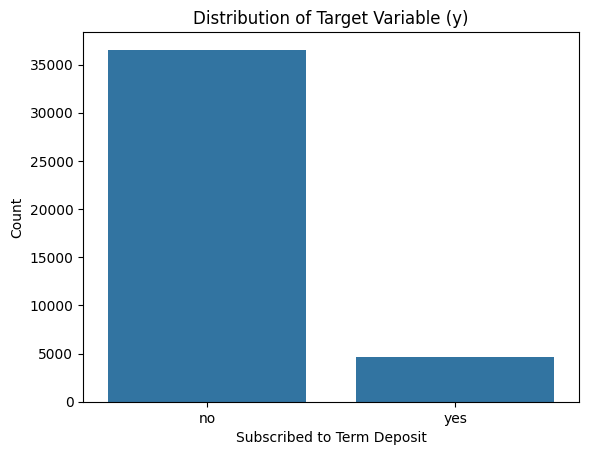

In [ ]:
sns.countplot(x='y', data=df_bank)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

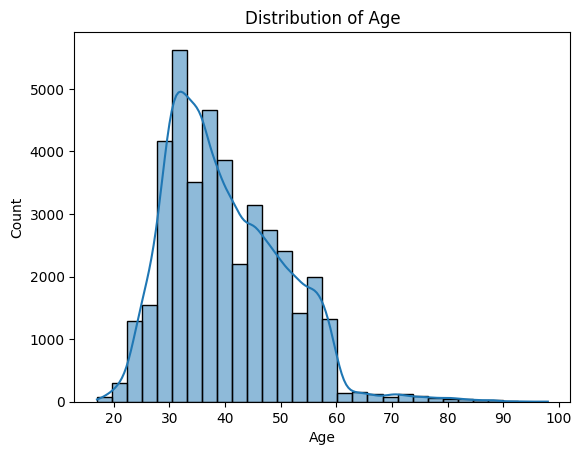

In [ ]:
sns.histplot(df_bank['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

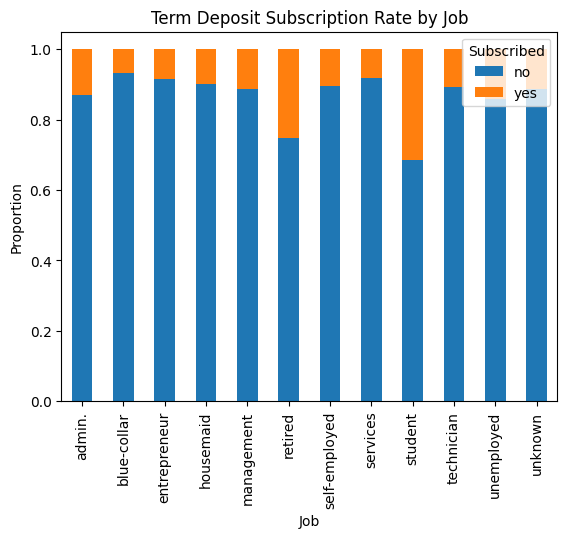

In [ ]:
job_success = df_bank.groupby('job')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

plt.title('Term Deposit Subscription Rate by Job')
plt.ylabel('Proportion')
plt.xlabel('Job')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

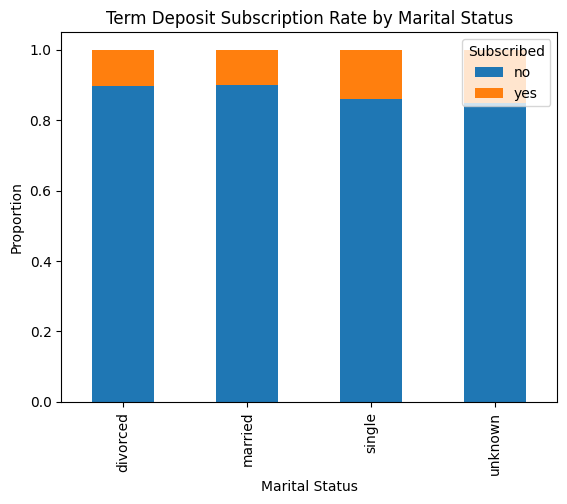

In [ ]:
marital_success = df_bank.groupby('marital')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

plt.title('Term Deposit Subscription Rate by Marital Status')
plt.ylabel('Proportion')
plt.xlabel('Marital Status')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

##### Questions